# Goal of the project

The goal of this project is to control a 2D quadrotor to perform acrobatic moves. There are 4 parts of the project, where you will build controllers of increasing complexity. The last part will lead to the implementation of the iterative LQR (iLQR) algorithm.

## Instructions
Answer all the questions in the 4 parts below. You will need to submit:
1. A report (pdf format only - every other format will be rejected) answering all the questions that do not request code. DO NOT include code in the report.
2. One (or several) Jupyter notebook(s) containing all the code used to answer the questions. The notebook(s) should be runnable as is.

## 2D quadrotor

The quadrotor is depicted in the following figure <img src='quadrotor.png' width="300">
The quadrotor model is written as
$$\begin{align} 
\dot{x} &= v_x\\
m \dot{v}_x &= - (u_1 + u_2) \sin \theta \\ 
\dot{y} &= v_y\\
m \dot{v}_y &= (u_1 + u_2) \cos \theta  - m g\\
\dot{\theta} &= \omega\\
I \dot{\omega} &= r (u_1 - u_2) \end{align}$$
where $x$ is the horizontal and $y$ the vertical positions of the quadrotor and $\theta$ is its orientation with respect to the horizontal plane. $v_x$ and $v_y$ are the linear velocities and $\omega$ is the angular velocity of the robot. $u_1$ and $u_2$ are the forces produced by the rotors (our control inputs). $m$ is the quadrotor mass, $I$ its moment of inertia (a scalar), $r$ is the distance from the center of the robot frame to the propellers and $g$ is the gravity constant. To denote the entire state, we will write $z = [x, v_x, y, v_y, \theta, \omega]^T$ - we will also write $u = [u_1, u_2]^T$.

The module ```quadrotor.py``` defines useful constants (mass, length, gravity, etc) and functions to simulate and animate the quadrotor as shown below.

## Part 1 - Setting up
1. Discretize the system dynamics using the method seen in class - write the time discretization step as $\Delta t$ (use symbols not numbers for the mass, etc)
2. Assume that the robot starts at an arbitrary position $x(0) = x_0$, $y(0) = y_0$ and $\theta(0) = 0$ with 0 velocities. Compute $u_1^*$ and $u_2^*$ such that the robot stays at this position forever after (you may test your answer using the simulation below).
3. Analyzing the system dynamics, is it possible to move in the x direction while keeping $\theta = 0$? Explain why.
4. Analyzing the system dynamics, is it possible to have the system at rest with $\theta = \frac{\pi}{2}$ (i.e. have the quadrotor in a vertical position)? Explain why.

## Part 2 - LQR to stay in place
Now that we have $u^*$ capable of keeping the robot at rest, we can design a simple controller that ensures that the robot stays in place even when pushed around by random disturbances (e.g. due to the wind). Our task here will be to design a LQR controller that keeps the robot at a predefined position. Since the dynamics is not linear, we need to compute a linear approximation of it.
1. Linearize the dynamics at an arbitrary operating point $z^*$, $u^*$ and write the linearized system dynamics using the variables $\bar{z}_n = z_n - z^*$ and $\bar{u}_n = u_n - u^*$.
2. Write a function ```get_linearization(z, u)``` that returns the matrices A and B given a state $z$ and a control $u$ (use the constants defined in the ``quadrotor.py`` module).
3. Using the linearized dynamics, we can design an infinite horizon LQR controller of the form, $\hat{u} = K \bar{z}$ to stabilize the resting point. Write the equations of the controller in the original coordinates $u$ as a function of $z$.
4. Design an infinite-horizon LQR controller that stabilizes the origin $z=0$ and test it using the simulator below.
5. Explain your intended design in the report, including the cost function and found control law. In particular, verify that it can handle perturbations by calling the ```simulate``` function with ```disturbance = True``` (when setting disturbance to ``True``, the simulator will generate a random perturbation every 1 second). Simulate your controller for 10 seconds, plot the state evolution and show the animation (include the plots in your report).

## Part 3 - following a trajectory using linearized dynamics
Now we want to follow a given trajectory leveraging a linearized version of the dynamics to design LQ controllers.
1. Assume that we want to follow a circle of radius 1 centered at (0,0) while keeping an orientation $\theta=\frac{\pi}{4}$, how does the linearization of the dynamics change along the desired trajectory? Why?
2. Design a tracking controller (using an LQ design with linear approximations) to follow this desired trajectory. Explain your design in the report. 
3. Test the tracking controller with the simulation (with and without the perturbations) and verify that you can indeed track the (x,y) trajectory very well. Are you able to also track $\theta$? (Explain) 
4. Analyze your results (including plots of the states, controls, etc). What benefits and issues do you see with this approach?
5. Answer questions 1-4 with a desired orientation of $\theta = 0$

## Part 4 - iterative LQR
Now we would like to do more complicated motions with the robot, like a flip. In this case, we do not have a prescribed trajectory but we would like to compute a locally optimal trajectory while we optimize the controller. We will use the *iterative LQR* algorithm to solve this problem.
### Task 1 - reaching a vertical orientation
In the first task, we want the robot to reach a vertical orientation $\theta = \frac{\pi}{2}$ at the location $x=3$ and $y=3$ at time $t=5$ starting from $z_0=0$. During the rest of the motion, the robot should try and stay close to the origin. It should also try to keep its control $u$ close to the control needed to keep the robot at rest. We want to make sure the robot reaches the origin $z=0$ at the end of the movement. 
1. Find a time-varying cost function that promotes such a behavior (use only quadratic/linear terms for simplicity). Assume $T=10$ seconds.
2. Write a function ```compute_cost(z,u, horizon_length)``` that returns the cost of a trajectory z with control trajectory u (using the cost function you wrote in question 1).
3. Compute the quadratic approximation of your cost function along an arbitrary trajectory of states $z_n$ with control trajectory $u_n$ (this is not just your cost function!)
4. Write a function ```get_quadratic_approximation_cost(z, u, horizon_length)``` that returns the quadratic approximation (Hessian matrices and Jacobians) of the cost function when approximated along the trajectory z with control trajectory u.
5. Write the iLQR algorithm that solves the problem using the functions written above. DO NOT FORGET the line search step at each iteration. For the line search, start with $\alpha = 1.$ and decrease it by half when the cost does not improve (you can stop when $\alpha < 0.01$).
6. Test the algorithm using as initial guess $u$ such that the robot is at rest (using the results of Part 1.2). Analyze your results (probably you will need to "tune" your cost function), plot the initial and final state and control trajectories, show the animation. Use the simulation without perturbations for simplicity. 
7. What benefits and issues do you see with this approach?
### Task 2 - doing a full flip
In the second task, we want the robot to do a full flip, trying to reach the upside-down state $x=1.5$, $y=3$ and $\theta = \pi$ at $t=5$ and upright state $x=3$, $y=0$ and $\theta = 2\pi$ at $T=10$.
8. Use iLQR (and a new cost function) to get the quadrotor to perform the task. Analyze your results. 
9. What benefits and issues do you see with this approach? Could you run the resulting controller on a real robot?

In [5]:
%matplotlib inline 
#%matplotlib notebook  #uncomment for Jupyter
#%matplotlib inline     #uncomment for VSCode

import numpy as np
import matplotlib.pyplot as plt
#from numpy import sin, cos, pi
import quadrotor
import sympy as sym

from sympy.utilities.lambdify import lambdify

In [6]:
# we can get its mass, half length (r), gravity constant
print(f'm is {quadrotor.MASS}')
print(f'r is {quadrotor.LENGTH}')
print(f'I is {quadrotor.INERTIA}')
print(f'g is {quadrotor.GRAVITY}')

# we can also get the integration step used in the simulation
print(f'dt is {quadrotor.DELTA_T}')

# we can get the size of its state and control vector
print(f'number of states {quadrotor.NUMBER_STATES} and number of controls {quadrotor.NUMBER_CONTROLS}')
print('the states are indexed as follows: x, vx, y, vy, theta, omega')

m is 0.6
r is 0.2
I is 0.15
g is 9.81
dt is 0.01
number of states 6 and number of controls 2
the states are indexed as follows: x, vx, y, vy, theta, omega


In [7]:
# we can simulate the robot but we need to provide a controller of the following form
x,V_x,y,V_y,theta,omega,u1,u2 = sym.symbols('x V_x y V_y theta omega u1 u2')
dt=quadrotor.DELTA_T
mass=quadrotor.MASS
Len=quadrotor.LENGTH
Inertia=quadrotor.INERTIA
grav=quadrotor.GRAVITY

np.warnings.filterwarnings('ignore', category=np.VisibleDeprecationWarning)

#______________________Flip/set to 0 or pi/4
theta_check=np.pi/4
#theta_check=0                       
#______________________test pi/4

def get_linearization(z,u):
        # Description
        #_______________________
        x     = z[0]
        V_x   = z[1]
        y     = z[2]
        V_y   = z[3]
        theta = z[4]
        omega = z[5]

        u1 = u[0]
        u2 = u[1]
        #________________________

        #__________________________________1
        # Continuous Dynamics for Quadrotor in Symbolic
        A_pseudo = sym.Matrix([[V_x],[0],[V_y],[-grav],[omega],[0]])
        B_pseudo = sym.Matrix([[0],[(-sym.sin(theta)/mass)*(u1+u2)],[0],[(sym.cos(theta)/mass)*(u1+u2)],[0],[(Len/Inertia)*(u1-u2)]])  
        dzdt=A_pseudo+B_pseudo
        dzdt_T=dzdt.T
        #___________________________________1
        
        #___________________________________2
        # Discrete Dynamics for Quadrotor in Symbolic
        z_n_T= z.T
        z_next = z_n_T + (dt*dzdt_T)
        #___________________________________2

        #___________________________________3
        # Jacobian from the Discrete Dynamics in Symbolic and Numeric
        A_sym = z_next.jacobian(z)
        B_sym = z_next.jacobian(u)
        A_num = lambdify((x,V_x,y,V_y,theta,omega,u1,u2),A_sym,'numpy')
        B_num = lambdify((x,V_x,y,V_y,theta,omega,u1,u2),B_sym,'numpy')
        #____________________________________3

        return A_num,B_num

#make A,B,K global
z_n = sym.Matrix([[x],[V_x],[y],[V_y],[theta],[omega]])
u_n = sym.Matrix([[u1],[u2]])
A_out,B_out=get_linearization(z_n,u_n)


def dummy_controller(state, i):
    """
        the prototype of a controller is as follows
        state is a column vector containing the state of the robot
        i is the index corresponding to the time step in the horizon (useful to index gains K for e.g.)
        
        this controller needs to return an array of size (2,)
    """

    def solve_LQR_trajectory(A, B, Q, R, x_bar, N):
        """
        A, B, Q and R are the matrices defining the OC problem
        x_bar is the trajectory of desired states of size dim(x) x (N+1)
        N is the horizon length

        The function returns 1) a list of gains of length N and 2) a list of feedforward controls of length N
        """
        K_gains = []
        k_feedforward = []
        for i in range(0,N+1):
            if i == 0:
                PN=Q
                P=PN
                qN=-Q@x_bar[:,N-i] #N-i, allows us to start from the begining(N-i) and end at 0
                p=qN

            else:
                #Initializing transposed arrays
                BT=np.transpose(B)
                AT=np.transpose(A)
                #Initializing variables for clean code
                qn=-Q@x_bar[:,N-i] #N-i, allows us to start from the begining(N-i) and end at 0
                Y=-np.linalg.inv(R+(BT@P@B))
                Z=AT@P@B

                #Main meat
                K_n = Y @ (BT@P@A)
                P_n = Q + (AT@P@A) + (Z@K_n)
                k_n = Y @ (BT@p)
                p_n = qn + (AT@p) + (Z@k_n)

                #for the next iteration
                P = P_n
                p = p_n

                #Stores the values in front, thereby bypassing .append and .reverse
                K_gains.insert(0,K_n)
                k_feedforward.insert(0,k_n)
        return K_gains, k_feedforward

    u_n1=np.zeros(2)
    u_n1[0]=mass*grav*0.5
    u_n1[1]=mass*grav*0.5
    A=A_out
    B=B_out
    A1 = A(state[0],state[1],state[2],state[3],state[4],state[5],u_n1[0],u_n1[1])
    B1 = B(state[0],state[1],state[2],state[3],state[4],state[5],u_n1[0],u_n1[1])
    Q=np.eye(6)*100
    R=np.eye(2)*0.01
    N=1000

    #____________________________ z_bar
    t1 = np.arange(0.,10.01, dt)
    N1 = len(t1)-1
    omega1 = 0.5*np.pi
    
    for ii in range(N1+1):
        omegaT=omega1*t1[ii]
        z_bar1 = np.array([[np.cos(omegaT)],[-omega1 * np.sin(omegaT)], [np.sin(omegaT)],[omega1 * np.cos(omegaT)],[theta_check],[0]])
        if ii == 0:
            z_bar=z_bar1
        else:
            z_bar = np.hstack((z_bar,z_bar1))
    #_________________________________
    #plt.plot(z_bar[0,:], z_bar[2,:])
    K_gains,k_feedforward = solve_LQR_trajectory(A1,B1,Q,R,z_bar,N)

    #state[4]=theta_check
    x_n=state.reshape(len(state),1)
    K_n=K_gains[i]
    k_n=k_feedforward[i]
    k_n=k_n.reshape(len(k_n),1)
    u_n=(K_n @ x_n) + k_n #Formula from Prof L. Righetti
    u=u_n.reshape(len(u_n),) #reshape of u/u_n to allow for stacking

    # here we do nothing and just return some non-zero control
    return u




# we can now simulate for a given number of time steps - here we do 10 seconds
horizon_length = 1000
z0 = np.zeros([quadrotor.NUMBER_STATES,])
z0[4]=theta_check
t, state, u = quadrotor.simulate(z0, dummy_controller, horizon_length, disturbance = False)

Text(0.5, 0, 'Time [s]')

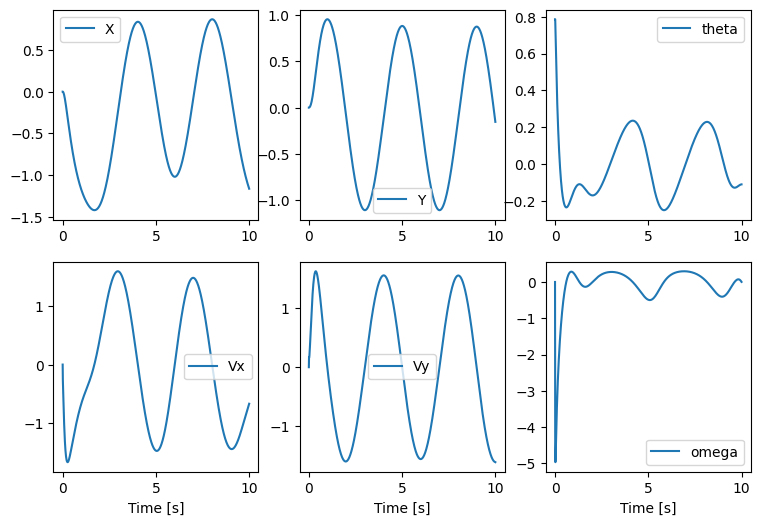

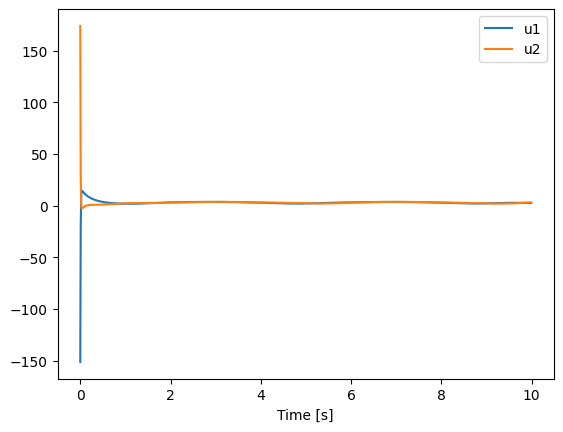

In [8]:
# we can plot the results
plt.figure(figsize=[9,6])

plt.subplot(2,3,1)
plt.plot(t, state[0,:])
plt.legend(['X'])

plt.subplot(2,3,2)
plt.plot(t, state[2,:])
plt.legend(['Y'])

plt.subplot(2,3,3)
plt.plot(t, state[4,:])
plt.legend(["theta"])

plt.subplot(2,3,4)
plt.plot(t, state[1,:])
plt.legend(['Vx'])
plt.xlabel('Time [s]')

plt.subplot(2,3,5)
plt.plot(t, state[3,:])
plt.legend(['Vy'])
plt.xlabel('Time [s]')

plt.subplot(2,3,6)
plt.plot(t, state[5,:])
plt.legend(['omega'])
plt.xlabel('Time [s]')

# we can also plot the control
plt.figure()
plt.plot(t[:-1], u.T)
plt.legend(['u1', 'u2'])
plt.xlabel('Time [s]')

In [9]:
# now we can also create an animation
quadrotor.animate_robot(state, u)

<source type="video/mp4" src="data:video/mp4;base64,AAAAIGZ0eXBNNFYgAAACAE00ViBpc29taXNvMmF2YzEAAAAIZnJlZQAAk+FtZGF0AAACrwYF//+r
3EXpvebZSLeWLNgg2SPu73gyNjQgLSBjb3JlIDE2NCByMzEwMSBiMDkzYmJlIC0gSC4yNjQvTVBF
Ry00IEFWQyBjb2RlYyAtIENvcHlsZWZ0IDIwMDMtMjAyMiAtIGh0dHA6Ly93d3cudmlkZW9sYW4u
b3JnL3gyNjQuaHRtbCAtIG9wdGlvbnM6IGNhYmFjPTEgcmVmPTMgZGVibG9jaz0xOjA6MCBhbmFs
eXNlPTB4MzoweDExMyBtZT1oZXggc3VibWU9NyBwc3k9MSBwc3lfcmQ9MS4wMDowLjAwIG1peGVk
X3JlZj0xIG1lX3JhbmdlPTE2IGNocm9tYV9tZT0xIHRyZWxsaXM9MSA4eDhkY3Q9MSBjcW09MCBk
ZWFkem9uZT0yMSwxMSBmYXN0X3Bza2lwPTEgY2hyb21hX3FwX29mZnNldD0tMiB0aHJlYWRzPTI3
IGxvb2thaGVhZF90aHJlYWRzPTQgc2xpY2VkX3RocmVhZHM9MCBucj0wIGRlY2ltYXRlPTEgaW50
ZXJsYWNlZD0wIGJsdXJheV9jb21wYXQ9MCBjb25zdHJhaW5lZF9pbnRyYT0wIGJmcmFtZXM9MyBi
X3B5cmFtaWQ9MiBiX2FkYXB0PTEgYl9iaWFzPTAgZGlyZWN0PTEgd2VpZ2h0Yj0xIG9wZW5fZ29w
PTAgd2VpZ2h0cD0yIGtleWludD0yNTAga2V5aW50X21pbj0xMCBzY2VuZWN1dD00MCBpbnRyYV9y
ZWZyZXNoPTAgcmNfbG9va2FoZWFkPTQwIHJjPWNyZiBtYnRyZWU9MSBjcmY9MjMuMCBxY29tcD0w
LjYwIHFwbWluPTAgcXBtYXg9NjkgcXBzdGVwPTQgaXBfcmF0aW89MS40MCBhcT0xOjEuMDAAgAAA
H69liIQAEP/+94G/MstfIrrJcfnnfSyszzzkPHJdia640AAAAwAAAwAAAwAGIxI3/ofxeM38AAAD
AAC3ABhQDCAKqAwqKe7+J+6nEAthk3z4NEVsiXDWZ2SIPprNolrAW9coFIQGQQogk1usCkk7gKLc
UjLZrhejXtCUcPUjlbYcy+yu9JWQjvWkunAVPdeDvyF9tLxVjIpotabFMJTVobn7sNL/ZmIE+0nq
+5i//d/tW8x5j/WWUm3D1th34Lb/lqRonpS6jyVmhoQZvIVAmDgcDuo5PlWD03+vw7tYq99Z+y+b
HyReNFrxo3z2EA4QBJsEFaRxlAqjSg1ElkVWMl5YHFMWMPV44U8/r8e+gYHGjCeClaVZ8BH4FG6Z
WgkicRT6ihsKd1pWWQToCa1wYUa6WxZj1tesogdhxnWhP62FWa6UKhPzVpQlcC8xbElV4WjIcMip
SB2FwsyOe4PjiDFmgCYqvBesO45CM0ednw1pqS0/yTOFPB+/uOYCsgAuHNakH1bAIiBcgFukIiPR
5HcOvFrk8R7HcsMP5cCD00OzFbxxx7aX8VHTYhVMlpmalle1ZDl/cE/wC3LWS/fxx66VCxWF0mN7
qDSXQGPpeaNgEtLmna2FcGi8IOTnq1zBbSlcCafl9/aFdeYjka+XSsNpT2FkjcXMM2LXdM1iaRIN
/VIrOeibMPA70bG1y+Yiu/997+Jcd6CJh8zrde1PsoH9Ax7FV0SsM+DJoqjZ/xX42q837Jjz+eyN
/YQXHabzJjgDbSH+fO/GPQkYwt4eLvCvix/s8Gs+Y7jJp7n8qNI0SGJrOdTnfxR2n9U1JX7eDFi4
P2dkCtO2o++3jIvPf2sX0Sg8Au1FYQ3h3f2hq8aJj257PsoUc6K3BLJqRv48jfClvmGixocpFmwi
fOT0J9/s9yEXN4sivx6AgkuEoIS17k+F5HKebHX1Q1MAAAMAAAMAAAMAAAT+G2WUArTgo3bxtAI6
eDOlC41QrK3gPkHDA6Tkh7/DwxsYaj7i6UgnW+PFdrEJjVxvI4spCj0Tp9eNb9UAI/kmh9DYjlmK
dEgWqdR3PzXOEsCkdWrzedfhKU1TlktCXoW2DaQAPEp5EDgt4DF5/+cuJj2Lzwhe2OBMII/Mn6Oq
LCDz6+gf/Oso0CF9V6fAlrjIqcIdyLJvH/zMwPBuYBqtoWReBXegRCgQdsshoywUhM+hL450oZHg
TZu0Lrw7TdDAbflTT5EyKbw2ErxZBn6kR6SteQ1PMz7sTEkA1RBJAbSyVb2/8isQBpIT5odCriXe
KMf9SOmf57XmuKVEgHydyINkKAlC+9sgG2G9tDMYAY8/ypspH4D5k4lrUZsKTGZUyHpoOQNw5+eP
4AAAAwAAAwAAAwAGQbY56Z2FJhyi5C24b05PSFB8Y+EggohmIxcZhvxlgKDRY8mlCp/iuUoeoz/h
OE2dJzfl2Dqpd/fcoRe9bT0e12T6H0ZVgvetXP0DaXx4NDb88aeYX4csVa6K4lQSemwUC+iyylzI
yco5xblPK48B8mMImNsFTa6AQWyTehG7FsB8FbUv1q8sd1uhKHZuuNeR95nJtPdOBccC4achCgOs
EHFTVQK+HczpiV69yEa7R9cz6MAUgDq9CTELLp1VFyJ9oDWQjf+NiCESQ7huMkI3hiHIA/tQkMbv
4PQnnWkDe5MVAvZ9aUqurouwCFIUxQ9S7fjomzBitcQAYhi6ujCMIpxdUBQxQgaI9jwMSd+v3oZj
DlGiB0Q348ENHuiTct646oYdz3AA/rSMfBxydcXR/CpjSxBWIrHZGmKvE+7+L3/HdAQ9wM4JW2ow
nSS8s6+emqHezfvg3TxMEnVdvUbYvu512BtJNi+8xfOSMsaGYxrg/v43srXUQQAAFFmlcZkJQOS7
vWKGzzQYAI8X4+LmEYtR5QAeJxUF+TBs4ufnL//oXmQNMuQijljCFBEFGKDkeT82+6MZ5iQXmN5L
1c7mF9NUD/10KPecHn36/ddWne0tS1YC9r9ZU2BU1BWiZQf+33uk5f97JlwcIGpRuEJXew0Rt/CA
keimVGv0ZVpgrrwJimXUTrdDUr06w7tFwMo4dMVWXopF0gjXj4lIHqrEEVl3Fp2AjaA8R6bRDHpV
TcVwrf0YxHlmSfss24KWXv/piY9Ej7hLscaEoeZK4LjX7q6XzqlzOBJuk2AmzC2LbVpXz0KLgeBm
J8rgmhp8eMbGB/0Vz2wR9uBnW+I+eXmvZP8RdeoXsJVAszsACFn1HthHIjFs3Pll+Urcsm7wFOPj
hepbgA6NmFAgAueIGW9RebIXPut9dc8KhwQfanq2+Lngh1aCqNWse4ml2zxds0Bj33GbwVZoaUY7
elc0yoDFQ4joBwCyyM7deZKFbKpYEP8418JNegbcuzPfPKfJZKVzl1oNYD605PnhfaSb20dHMFLI
Xu2GgQBAL67cQXKI6vpSD13hZ1iJXbUrJieP2S0+6w5oMRJKPMoi92pi/XcgeZGj+Yeyz+f3M9On
hafSNkBybXhLIX+a9Z7O58KY/SN/67YIBuPmSMNu4LnqU5RbAlWKakr28t3cXLy1wrr4qtwQ6HUm
37BEmMaH3oETTNfAMeQconfi2cePGmfIcAQivg6thkd4yDnJRXwLsFY/wWd+SsnZ2NUzzcF2yI5d
zHl4sAkd0st8NXiv3FZE7mvyOK4DlS4v4MqREOQio5Zh5HMDQ5SIQI1RoWFGmo+76QIHHOHyUcDj
7HIzvkrvWnbRreM9j8O76B82NE+yKZ10N2+6/4FQJZG71wRoP0/L6eFzd+gYspg+Tai50Q2q9hZg
FouvbTRGo34nAnlDeegfVSgrux5LZ+Wt0N9xXwU+RuuUjKgQ4NjobMsL84cAaZFlJG8ybNLmxo3d
y+H9UTrZa2Txm9ZV3hfPE

<source type="video/mp4" src="data:video/mp4;base64,AAAAIGZ0eXBNNFYgAAACAE00ViBpc29taXNvMmF2YzEAAAAIZnJlZQAAkKltZGF0AAACrwYF//+r
3EXpvebZSLeWLNgg2SPu73gyNjQgLSBjb3JlIDE2NCByMzEwMSBiMDkzYmJlIC0gSC4yNjQvTVBF
Ry00IEFWQyBjb2RlYyAtIENvcHlsZWZ0IDIwMDMtMjAyMiAtIGh0dHA6Ly93d3cudmlkZW9sYW4u
b3JnL3gyNjQuaHRtbCAtIG9wdGlvbnM6IGNhYmFjPTEgcmVmPTMgZGVibG9jaz0xOjA6MCBhbmFs
eXNlPTB4MzoweDExMyBtZT1oZXggc3VibWU9NyBwc3k9MSBwc3lfcmQ9MS4wMDowLjAwIG1peGVk
X3JlZj0xIG1lX3JhbmdlPTE2IGNocm9tYV9tZT0xIHRyZWxsaXM9MSA4eDhkY3Q9MSBjcW09MCBk
ZWFkem9uZT0yMSwxMSBmYXN0X3Bza2lwPTEgY2hyb21hX3FwX29mZnNldD0tMiB0aHJlYWRzPTI3
IGxvb2thaGVhZF90aHJlYWRzPTQgc2xpY2VkX3RocmVhZHM9MCBucj0wIGRlY2ltYXRlPTEgaW50
ZXJsYWNlZD0wIGJsdXJheV9jb21wYXQ9MCBjb25zdHJhaW5lZF9pbnRyYT0wIGJmcmFtZXM9MyBi
X3B5cmFtaWQ9MiBiX2FkYXB0PTEgYl9iaWFzPTAgZGlyZWN0PTEgd2VpZ2h0Yj0xIG9wZW5fZ29w
PTAgd2VpZ2h0cD0yIGtleWludD0yNTAga2V5aW50X21pbj0xMCBzY2VuZWN1dD00MCBpbnRyYV9y
ZWZyZXNoPTAgcmNfbG9va2FoZWFkPTQwIHJjPWNyZiBtYnRyZWU9MSBjcmY9MjMuMCBxY29tcD0w
LjYwIHFwbWluPTAgcXBtYXg9NjkgcXBzdGVwPTQgaXBfcmF0aW89MS40MCBhcT0xOjEuMDAAgAAA
H6pliIQAEP/+94G/MstfIrrJcfnnfSyszzzkPHJdia640AAAAwAAAwAAAwAGIxI3/ofxeM38AAAD
AAC3ABhQDCAKqAwqKe7+J+6nEAthk3z4NEVsiXDWZ2SIPprNolrAW9coFIQGQQogk1usCkk7gKLc
UjLZrhejXtCUcPUjlbYcy+yu9JWQjvWkunAVPdeDvyF9tLxVjIpotabFMJTVobn7sNL/ZmIE+0nq
+5i//d/tW8x5j/WWUm3D1th34Lb/lqRonpS6jyVmhoQZvIVAmDgcDuo5PlWD03+vw7tYq99Z+y+b
HyReNFrxo3z2EA4QBJsEFaRxlAqjSg1ElkVWMl5YHFMWMPV44U8/r8e+gYHGjCeClaVZ8BH4FG6Z
WgkicRT6ihsKd1pWWQToCa1wYUa6WxZj1tesogdhxnWhP62FWa6UKhPzVpQlcC8xbElV4WjIcMip
SB2FwsyOe4PjiDFmgCYqvBesO45CM0ednw1pqS0/yTOFPB+/uOYCsgAuHNakH1bAIiBcgFukIiPR
5HcOvFrk8R7HcsMP5cCD00OzFbxxx7aX8VHTYhVMlpmalle1ZDl/cE/wC3LWS/fxx66VCxWF0mN7
qDSXQGPpeaNgEtLmna2FcGi8IOTnq1zBbSlcCafl9/aFdeYjka+XSsNpT2FkjcXMM2LXdM1iaRIN
/VIrOeibMPA70bG1y+Yiu/997+Jcd6CJh8zrde1PsoH9Ax7FV0SsM+DJoqjZ/xX42q837Jjz+eyN
/YQXHabzJjgDbSH+fO/GPQkYwt4eLvCvix/s8Gs+Y7jJp7n8qNI0SGJrOdTnfxR2n9U1JX7eDFi4
P2dkCtO2o++3jIvPf2sX0Sg8Au1FYQ3h3f2hq8aJj257PsoUc6K3BLJqRv48jfClvmGixocpFmwi
fOT0J9/s9yEXN4sivx6AgkuEoIS17k+F5HKebHX1Q1MAAAMAAAMAAAMAAAT+G2WUArTgo3bxtAI6
eDOlC41QrK3gPkHDA6Tkh7/DwxsYaj7i6UgnW+PFdrEJjVxvI4spCj0Tp9eNb9UAI/kmh9DYjlmK
dEgWqdR3PzXOEsCkdWrzedfhKU1TlktCXoW2DaQAPEp5EDgt4DF5/+cuJj2Lzwhe2OBMII/Mn6Oq
LCDz6+gf/Oso0CF9V6fAlrjIqcIdyLJvH/zMwPBuYBqtoWReBXegRCgQdsshoywUhM+hL450oZHg
TZu0Lrw7TdDAbflTT5EyKbw2ErxZBn6kR6SteQ1PMz7sTEkA1RBJAbSyVb2/8isQBpIT5odCriXe
KMf9SOmf57XmuKVEgHydyINkKAlC+9sgG2G9tDMYAY8/ypspH4D5k4lrUZsKTGZUyHpoOQNw5+eP
4AAAAwAAAwAAAwAGQbY56Z2FJhyi5C24b05PSFB8Y+EggohmIxcZhvxlgKDRY8mlCp/iuUoeoz/h
OE2dJzfl2Dqpd/fcoRe9bT0e12T6H0ZVgvetXP0DaXx4NDb88aeYX4csVa6K4lQSemwUC+iyylzI
yco5xblPK48B8mMImNsFTa6AQWyTehG7FsB8FbUv1q8sd1uhKHZuuNeR95nJtPdOBccC4achCgOs
EHFTVQK+HczpiV69yEa7R9cz6MAUgDq9CTELLp1VFyJ9oDWQjf+NiCESQ7huMkI3hiHIA/tQkMbv
4PQnnWkDe5MVAvZ9aUqurouwCFIUxQ9S7fjomzBitcQAYhi6ujCMIpxdUBQxQgaI9jwMSd+v3oZj
DlGiB0Q348ENHuiTct646oYdz3AA/rSMfBxydcXR/CpjSxBWIrHZGmKvE+7+L3/HdAQ9wM4JW2ow
nSS8s6+emqHezfvg3TxMEnVa3dK4TNjsG+NmuUGB2dvRsd6gxvU/v5Bsro3cQAAABtR+1ZADZpyK
TNTa3gM6iL2nvSiAuG4AKnpKC/Jg2cXPzl//0LzIGmXIRRyxhCgiCjFByPJ+bfdGM8xILzG8l6ud
zC+mqB/66FHvODz79fuurTvaWpasBe1+sqbAqagrRMoP/b73Scv+9ky4OEDUo3CErvYaI2/hASPR
TKjXgMq0wV14ExTLqJ1uhqV1FYd1m8FoZLuKrL0Ui6QRrx8SkD1ViCKy7i07ARtAeI9Nohj0qpuK
4Vv6MYjyzJP2WbcFLL3/0xMefh9wl2ONCUPMlcFxr91dL51S5nAk3SbATZhbFtq0r56FFwPAzE+V
wTQ0+PGNjA/6K57YI+3AzrfEfPLzXsn+ItAXD2EqgWZ2ABCz6j2wjkRi2bnyy/KVuWTd4CnHxwvU
twDQ2kNNpDOnKyIA1oYmQufdb634t6HAbBhxM3NbiEOYq8heSpJJ2XOrq6hUwJlol+CrG4D+gamr
mmVAYqHEdAOAWWRnbrzJQrZVLAh/nGvhJruDEgrVoIr3yWSlc5daDWA+qRyqsL7SSH3VI5gpZC92
w0AyN6/FoZtB4b1Go/QNes7EJvhyZNVo45NmlM6myYqqSjzKIvdqYv13IHmRo/mHss/n9vITp4Wn
0jZAcm14SyF/mvWezufCmP0jf+u2CAbj5kjDbuC56lOUWwJVimpK9vLd3Fy8tcK6+KrcEOh1Jt+w
RJjGh96BE0zXwDBbJrSgZK8j0AXxRAx9YXmKthkd4yDnJRXwLsFY/rWd+Ss/Z2NUzzcF2yI5dzHl
4m8anAVW+GrxX7isidzX5HFcBypcX8GVIbi+dibHbmvoDQ5SIQI1Rm1DvGesR1gsHHOHyUcDj7HI
zvkrvWnbRreM9j8O76B82NE+yKZ10N2+6/4CGLowfvXcQnJ+X08Lm79EwntqzU0UKYPk2n7l0RnR
iNojRHXtpojUb/TATGhAXwJcbEjS26jZjkM+h1pp8FPkbrlIyoEODY6GzK/fHHAIt43jIZAybMwW
67Nj8vP8nVj4kBYXY5g5/

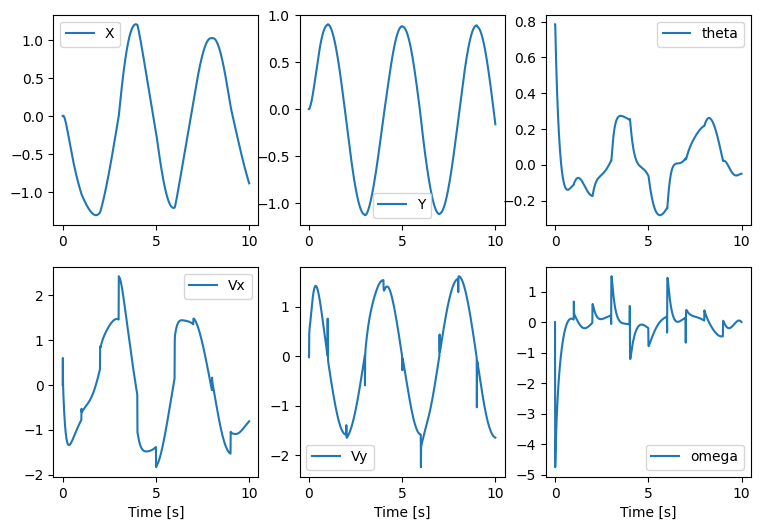

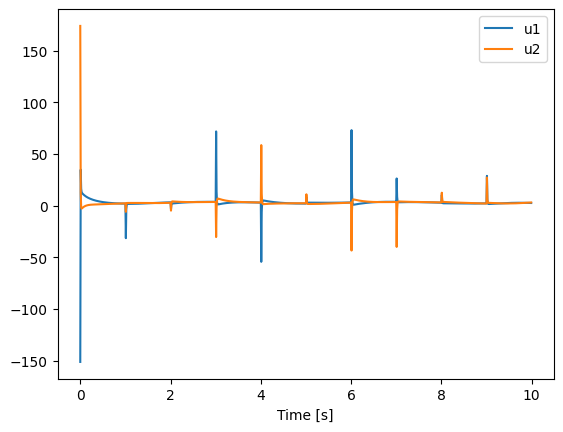

In [10]:
# we can also simulate with perturbations
t, state, u = quadrotor.simulate(z0, dummy_controller, horizon_length, disturbance = True)

# we can plot the results
plt.figure(figsize=[9,6])

plt.subplot(2,3,1)
plt.plot(t, state[0,:])
plt.legend(['X'])

plt.subplot(2,3,2)
plt.plot(t, state[2,:])
plt.legend(['Y'])

plt.subplot(2,3,3)
plt.plot(t, state[4,:])
plt.legend(["theta"])

plt.subplot(2,3,4)
plt.plot(t, state[1,:])
plt.legend(['Vx'])
plt.xlabel('Time [s]')

plt.subplot(2,3,5)
plt.plot(t, state[3,:])
plt.legend(['Vy'])
plt.xlabel('Time [s]')

plt.subplot(2,3,6)
plt.plot(t, state[5,:])
plt.legend(['omega'])
plt.xlabel('Time [s]')

# we can also plot the control
plt.figure()
plt.plot(t[:-1], u.T)
plt.legend(['u1', 'u2'])
plt.xlabel('Time [s]')

quadrotor.animate_robot(state,u)